# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import datetime
import openweathermapy.core as owm
# import pytemperature
# not a standard library: pip install pytemperature

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# not a standard library: pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# now
now = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API used: https://openweathermap.org/api

# by coordinates: api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# by city name: api.openweathermap.org/data/2.5/weather?q=London

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# variables
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

count = 1

# query_url = url + "appid=" + api_key + "&q=" + city #to do
generic_weather_url = url + "appid=" + api_key +'&units=imperial' + "&q="
pp = pprint.PrettyPrinter(indent=4)

# settings = {"units": "imperial", "appid": api_key}
# print(city_data)
# City=city_data('name')
# Cloudiness=city_data('clouds.all')
# Country=city_data('sys.country')
# Date=city_data('dt')
# Humidity=city_data('main.humidity')
# Lat=city_data('coord.lat')
# Lng=city_data('coord.lon')
# Max_Temp=city_data('main.temp_max')
# Wind_Speed=city_data('wind.speed')     
# print(Max_Temp)

In [10]:
pp = pprint.PrettyPrinter(indent=4)

# functionality
# the settings functionality is understood, but to me it decreases readability: see usage in previous cell
print(f'\033[4m' 'Beginning Data Retrieval' '\033[0m') # status update while processing
for count, city in enumerate(cities, start=1):
    # Build query URL 
    query_url = generic_weather_url + city
#     city_data = owm.get_current(city, **settings)
    # Get weather data
    print(f'Processing Record {count} of Set 1 | {city}')
    # try statement was implemented next to the if statement in case the if else statement would dump
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        if weather_json['cod'] != 200:
            print(f'City not found. Skipping...')
        else: #include in our dataset
    #         pp.pprint(weather_json)
            humidity = float(weather_json['main']['humidity'])
            if humidity <= 100:  
                # a whole scientific argument can be made on what the maximum humidity
                # can be, but I do not think that is the goal of the exercise. I assume the goal of the 
                # exercise is to show that one thought about the data and made some adjustments based upon the 
                # data presented
                City.append(weather_json['name'])
                Cloudiness.append(weather_json['clouds']['all'])
                Country.append(weather_json['sys']['country'])
                Date.append(weather_json['dt'])
                Humidity.append(weather_json['main']['humidity'])
                Lat.append(weather_json['coord']['lat'])
                Lng.append(weather_json['coord']['lon'])
                Max_Temp.append(weather_json['main']['temp_max'])
                Wind_Speed.append(weather_json['wind']['speed'])
    except:
        print(f'City not found. Skipping...')        

Beginning Data Retrieval
Processing Record 1 of Set 1 | atar
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | fort nelson
Processing Record 4 of Set 1 | itaituba
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | jumla
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | cochrane
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | nalut
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | nikki
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | elizabeth city
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | caravelas
Proce

Processing Record 184 of Set 1 | avarua
Processing Record 185 of Set 1 | asau
City not found. Skipping...
Processing Record 186 of Set 1 | chama
Processing Record 187 of Set 1 | acajutla
Processing Record 188 of Set 1 | saleaula
City not found. Skipping...
Processing Record 189 of Set 1 | haines junction
Processing Record 190 of Set 1 | maicao
Processing Record 191 of Set 1 | olafsvik
City not found. Skipping...
Processing Record 192 of Set 1 | norman wells
Processing Record 193 of Set 1 | south lake tahoe
Processing Record 194 of Set 1 | aklavik
Processing Record 195 of Set 1 | orlovskiy
Processing Record 196 of Set 1 | port-gentil
Processing Record 197 of Set 1 | kholtoson
Processing Record 198 of Set 1 | iqaluit
Processing Record 199 of Set 1 | kaitangata
Processing Record 200 of Set 1 | thatcham
Processing Record 201 of Set 1 | palasa
City not found. Skipping...
Processing Record 202 of Set 1 | kandi
Processing Record 203 of Set 1 | warrington
Processing Record 204 of Set 1 | barro

Processing Record 358 of Set 1 | yamada
Processing Record 359 of Set 1 | waw
City not found. Skipping...
Processing Record 360 of Set 1 | tukrah
City not found. Skipping...
Processing Record 361 of Set 1 | booue
Processing Record 362 of Set 1 | antofagasta
Processing Record 363 of Set 1 | tanout
Processing Record 364 of Set 1 | narsaq
Processing Record 365 of Set 1 | vanavara
Processing Record 366 of Set 1 | eyl
Processing Record 367 of Set 1 | monte carmelo
Processing Record 368 of Set 1 | rolim de moura
City not found. Skipping...
Processing Record 369 of Set 1 | margate
Processing Record 370 of Set 1 | meulaboh
Processing Record 371 of Set 1 | kieta
Processing Record 372 of Set 1 | lolua
City not found. Skipping...
Processing Record 373 of Set 1 | haapu
City not found. Skipping...
Processing Record 374 of Set 1 | namibe
Processing Record 375 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 376 of Set 1 | santa barbara
Processing Record 377 of Set 1 | fairbanks
P

Processing Record 539 of Set 1 | shimoda
Processing Record 540 of Set 1 | sao filipe
Processing Record 541 of Set 1 | purpe
Processing Record 542 of Set 1 | peleduy
Processing Record 543 of Set 1 | skjaerhollen
City not found. Skipping...
Processing Record 544 of Set 1 | mankera
Processing Record 545 of Set 1 | bilma
Processing Record 546 of Set 1 | ginir
Processing Record 547 of Set 1 | bambanglipuro
Processing Record 548 of Set 1 | burnie
Processing Record 549 of Set 1 | ngunguru
Processing Record 550 of Set 1 | shingu
Processing Record 551 of Set 1 | waipawa
Processing Record 552 of Set 1 | finschhafen
Processing Record 553 of Set 1 | seoul
Processing Record 554 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 555 of Set 1 | gushikawa
Processing Record 556 of Set 1 | sjenica
Processing Record 557 of Set 1 | les cayes
Processing Record 558 of Set 1 | san ignacio
Processing Record 559 of Set 1 | xinmin
Processing Record 560 of Set 1 | nanortalik
Processing Record 56

In [11]:
# build the dataframe
city_weather_dict = {
    'City':          City,
    'Cloudiness':    Cloudiness,
    'Country':       Country,
    'Date':          Date,
    'Humidity':      Humidity,
    'Lat':           Lat,
    'Lng':           Lng,
    'Max Temp':      Max_Temp,
    'Wind Speed':    Wind_Speed    
}
city_weather_data = pd.DataFrame(city_weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_weather_data.to_csv('WeatherPy.csv',index=False)
city_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 9 columns):
City          1140 non-null object
Cloudiness    1140 non-null int64
Country       1140 non-null object
Date          1140 non-null int64
Humidity      1140 non-null int64
Lat           1140 non-null float64
Lng           1140 non-null float64
Max Temp      1140 non-null float64
Wind Speed    1140 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 80.2+ KB


In [17]:
city_weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atar,0,MR,1553362717,27,20.52,-13.05,81.49,10.33
1,Fort Nelson,75,CA,1553360400,74,58.81,-122.69,35.60,8.05
2,Itaituba,75,BR,1553360400,70,-4.26,-55.99,86.00,3.96
3,Bluff,0,AU,1553362578,89,-23.58,149.07,70.24,3.74
4,Hambantota,8,LK,1553362718,100,6.12,81.12,79.24,4.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [20]:
def generic_plot(ax_x,ax_y):
#     Build a scatter plot 
    plt.scatter(city_weather_data[ax_x], city_weather_data[ax_y], marker="o",edgecolors='black')
    x_label='Latitude'
    if ax_y == 'Max Temp':
        y_label = 'Max Temperature (F)'
        plot_title = 'City Latitude vs. Max Temperature'
    elif ax_y == 'Humidity':
        y_label= 'Humidity (%)'
        plot_title = 'City Latitude vs. Humidity'
    elif ax_y == 'Cloudiness':
        y_label= 'Cloudiness (%)'
        plot_title = 'City Latitude vs. Cloudiness'
    elif ax_y == 'Wind Speed':
        y_label= 'Wind Speed (mph)'
        plot_title = 'City Latitude vs. Wind Speed'
    else:
        y_label= 'N/A'
        plot_title = 'N/A'
   
    today=now.strftime("%m/%d/%Y")
    plot_title=plot_title+ ' ('+today+')'
    # Incorporate the other graph properties
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    
    # Save Figure
    fig_title = (f'{plot_title}.png')
    if ax_y == 'Max Temp':
        plt.savefig('City Latitude vs Max Temp.png')
    elif ax_y == 'Humidity':
        plt.savefig('City Latitude vs Humidity.png')
    elif ax_y == 'Cloudiness':
        plt.savefig('City Latitude vs Cloudiness.png')
    elif ax_y == 'Wind Speed':
        plt.savefig('City Latitude vs Wind Speed.png')
    else:
        plt.savefig('Not Applicable.png')
    
    # Show plot
    plt.show()

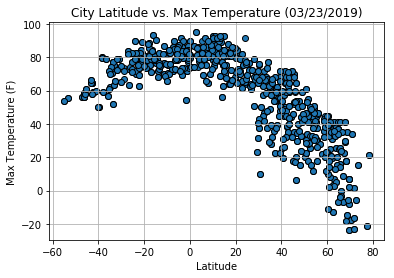

In [21]:
generic_plot('Lat','Max Temp')

In [22]:
# The temperature reading is fairly even in the -20 to +20 band. Given the time of the year, the lower temperature
# in the +40 to +60 is to be expected.

#### Latitude vs. Humidity Plot

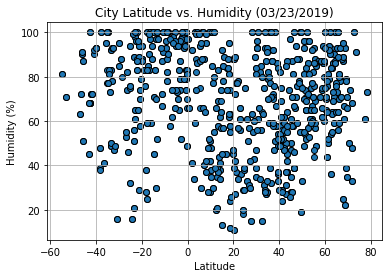

In [23]:
generic_plot('Lat','Humidity')

In [24]:
# This comparison does not seem to be useful. Additional component are probably required (like altitude, approprimity to
# a water source, etc.)

#### Latitude vs. Cloudiness Plot

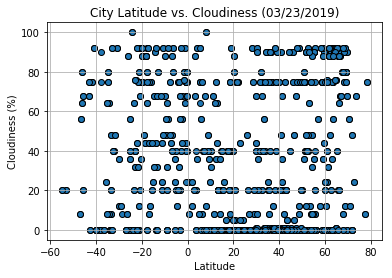

In [25]:
generic_plot('Lat','Cloudiness')

In [26]:
# This comparison does not seem to be useful. No obvious correlation.

#### Latitude vs. Wind Speed Plot

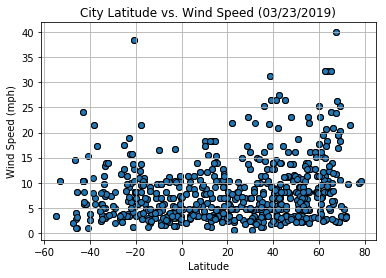

In [27]:
generic_plot('Lat','Wind Speed')

In [28]:
# Less cloudiness with higher windspeeds seems like a logical conclusion. The more dense band between +40 and +60 at 
# higher windspeeds is interesting.